# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

df = pd.read_csv("data.csv", sep = ',') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [4]:
cred_hist_yes = df['Credit_History'][df['Credit_History'] == 1].count()

cred_hist_no = df['Credit_History'][df['Credit_History'] != 1].count()

print(str(cred_hist_yes) + ' people have credit history, while ' + str(cred_hist_no) + ' do not.')

475 people have credit history, while 89 do not.


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

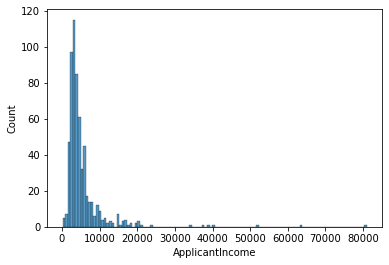

In [5]:
sns.histplot(data = df, x = df['ApplicantIncome'])

In [6]:
# Code for transforming to log, move to where necessary


#df_log = np.log(df['ApplicantIncome'])
#Q3, Q1 = np.percentile(df_log, [75 ,25])
#IQR = Q3 - Q1
#outliers = (df_log <= (Q1 - 1.5 * IQR)) | (df_log >= (Q3 + 1.5 * IQR))
#df_appinc_no_outliers = df_log[~outliers]
#sns.histplot(data = df_appinc_no_outliers, x = df_appinc_no_outliers)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

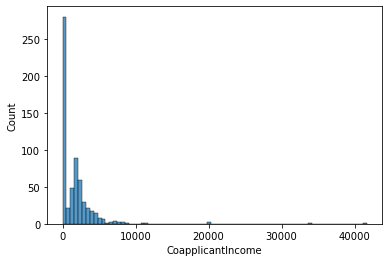

In [7]:
sns.histplot(data = df, x = df['CoapplicantIncome'])

In [8]:
# Many co-applicants have no income

# Just from looking at the pre-log transformed sets, you could see a right skew
# We can confirm this by finding out if the mean is less than the median
# Mean < Median is typical of right skewed data

In [9]:
df['ApplicantIncome'].mean(), df['ApplicantIncome'].median()

(5403.459283387622, 3812.5)

In [10]:
df['CoapplicantIncome'].mean(), df['CoapplicantIncome'].median()

(1621.245798027101, 1188.5)

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [11]:
df_cats = df.select_dtypes(exclude = np.number)

In [12]:
df_cats.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [16]:
df['Loan_Status_map'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_map
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [18]:
# Making a pivot table (pivot tables aggfunc defaults to mean of the values)
credit_pivot = df.pivot_table(values = 'Loan_Status_map', index = ['Credit_History'])
credit_pivot

,Loan_Status_map
Credit_History,
0.0,0.078652
1.0,0.795789


In [19]:
married_pivot = df.pivot_table(values = 'Loan_Status_map', index = ['Married'])
married_pivot

,Loan_Status_map
Married,
No,0.629108
Yes,0.716080


In [20]:
education_pivot = df.pivot_table(values = 'Loan_Status_map', index = ['Education'])
education_pivot

,Loan_Status_map
Education,
Graduate,0.708333
Not Graduate,0.611940


In [21]:
triple_pivot = df.pivot_table(values = 'Loan_Status_map', index = ['Education', 'Credit_History', 'Married'])
triple_pivot

Loan_Status_map
Education    Credit_History Married                 
Graduate     0.0            No              0.115385
                            Yes             0.081081
             1.0            No              0.732824
                            Yes             0.845528
Not Graduate 0.0            No              0.000000
                            Yes             0.050000
             1.0            No              0.722222
                            Yes             0.762712

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



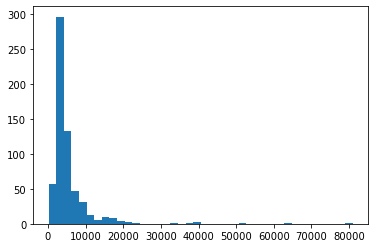

In [22]:
plt.hist(df['ApplicantIncome'], bins = 40)
plt.show()

# This clearly shows some outliers


Look at box plots to understand the distributions. 

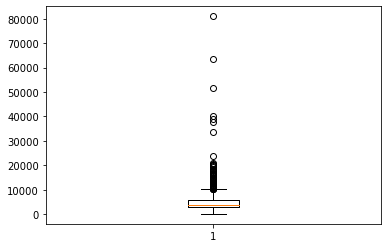

In [23]:
plt.boxplot(df['ApplicantIncome'])
plt.show()

Look at the distribution of income segregated  by `Education`

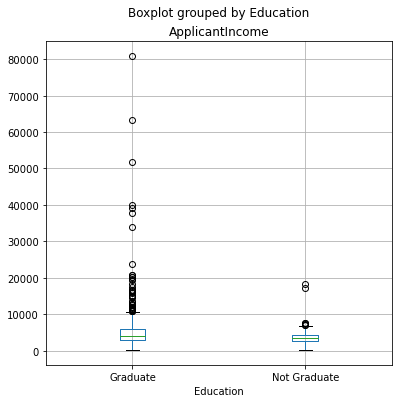

In [24]:
df.boxplot(column = 'ApplicantIncome', by = 'Education', figsize = (6, 6))
plt.show()

Look at the histogram and boxplot of LoanAmount

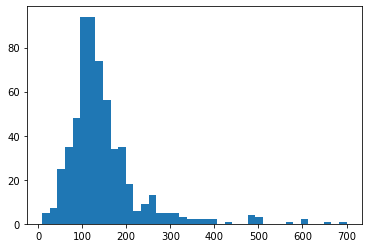

In [25]:
plt.hist(df['LoanAmount'], bins = 40)
plt.show()

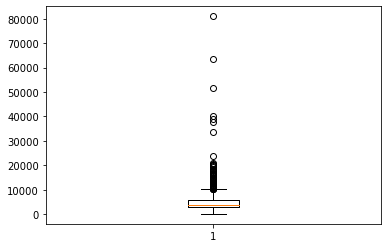

In [26]:
plt.boxplot(df['ApplicantIncome'])
plt.show()

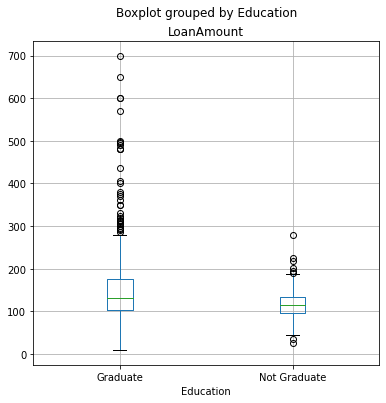

In [27]:
df.boxplot(column = 'LoanAmount', by = 'Education', figsize = (6, 6))
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [28]:
# Already did pivot tables above

In [29]:
credit_count = df['Credit_History'].value_counts()
credit_count

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [30]:
married_count = df['Married'].value_counts()
married_count

Yes    398
No     213
Name: Married, dtype: int64

In [31]:
education_count = df['Education'].value_counts()
education_count

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [32]:
plt.rcParams["figure.figsize"] = (10, 10)

Text(0.5, 0, 'Education Status')

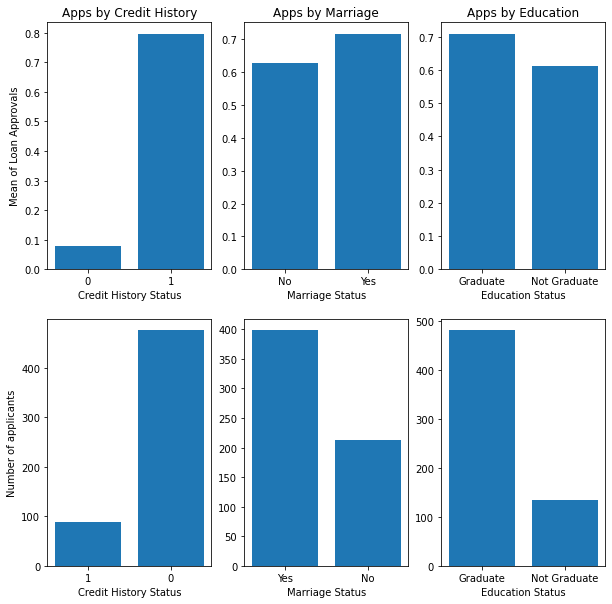

In [33]:
fig, axes = plt.subplots(2, 3)
ax1 = axes[0, 0]
ax2 = axes[0 ,1]
ax3 = axes[0, 2]
ax4 = axes[1, 0]
ax5 = axes[1, 1]
ax6 = axes[1, 2]

ax1.bar(data = credit_pivot, x = credit_pivot.index , height = credit_pivot.Loan_Status_map, tick_label = (0, 1))
ax1.set_title('Apps by Credit History')
ax1.set_xlabel('Credit History Status')
ax1.set_ylabel('Mean of Loan Approvals')

ax2.bar(data = married_pivot, x = married_pivot.index , height = married_pivot.Loan_Status_map)
ax2.set_title('Apps by Marriage')
ax2.set_xlabel('Marriage Status')


ax3.bar(data = education_pivot, x = education_pivot.index , height = education_pivot.Loan_Status_map)
ax3.set_title('Apps by Education')
ax3.set_xlabel('Education Status')

ax4.bar(data = credit_count, x = credit_count.index , height = credit_count, tick_label = (0, 1))
ax4.set_xlabel('Credit History Status')
ax4.set_ylabel('Number of applicants')

ax5.bar(data = married_count, x = married_count.index , height =married_count)
ax5.set_xlabel('Marriage Status')

ax6.bar(data = education_count, x = education_count.index , height = education_count)
ax6.set_xlabel('Education Status')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python